In [0]:
import os
from IPython.display import clear_output
os.chdir("./drive/My Drive/Colab Notebooks/SDSProject/MyProject")
os.getcwd()
os.listdir(".")

In [0]:
#Run this the first time to download JIGSAWS datasets and unzip
'''
!pip install wget
!wget https://cs.jhu.edu/~los/jigsaws/dwnld/DAqBjdiRPB8xXnYpsplWSmqmg96JKe6x/Knot_Tying.zip
!wget https://cs.jhu.edu/~los/jigsaws/dwnld/DAqBjdiRPB8xXnYpsplWSmqmg96JKe6x/Needle_Passing.zip
!wget https://cs.jhu.edu/~los/jigsaws/dwnld/DAqBjdiRPB8xXnYpsplWSmqmg96JKe6x/Suturing.zip
!wget https://cs.jhu.edu/~los/jigsaws/dwnld/DAqBjdiRPB8xXnYpsplWSmqmg96JKe6x/Experimental_setup.zip
os.chdir("./Data")
os.getcwd()
!unzip -o Knot_Tying.zip -d jigsaws
!unzip -o Needle_Passing.zip -d jigsaws
!unzip -o Suturing.zip -d jigsaws
!unzip -o Experimental_setup.zip -d jigsaws
os.chdir("..")
#clear_output()
'''

In [0]:
import numpy as np
import imageio, collections
import time, os, math, re, random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [0]:
#File functions
def getExpertiseLevelOfSurgery(surgery_name):
	## function getMetaDataForSurgeries should be already called
	if surgeries_metadata.__contains__(surgery_name):
		return surgeries_metadata[surgery_name][0]
	return None 

def getMetaDataForSurgeries(surgery_type):
	surgeries_metadata = {}
	file = open(root_dir+surgery_type+'/'+'meta_file_'+surgery_type+'.txt','r')
	for line in file: 
		line = line.strip() ## remove spaces
	
		if len(line)==0: ## if end of file
			break

		b = line.split()
		surgery_name = b[0] 
		expertise_level = b[1]
		b = b[2:]
		scores = [int(e) for e in b]
		surgeries_metadata[surgery_name]=(expertise_level,scores)
	return surgeries_metadata

def get_trial_num(surgery_name,surgery_type):
	trial_num = surgery_name.replace(surgery_type+'_',"")[-1]
	return trial_num

def readFile(file_name,dtype,columns_to_use=None):
	X = np.loadtxt(file_name,dtype,usecols=columns_to_use)
	return X


def generateMaps(surgery_type):
	listOfSurgeries =[]
	y =[]
	path = root_dir+surgery_type+'/kinematics/AllGestures/'
	for subdir,dirs,files in os.walk(path):
		for file_name in files: 
			surgery = readFile(path+file_name,float,columns_to_use=dimensions_to_use)
			surgery_name = file_name[:-4]
			expertise_level = getExpertiseLevelOfSurgery(surgery_name)
			if expertise_level is None: 
				continue
			mapSurgeryDataBySurgeryName[surgery_name] = surgery
			mapExpertiseLevelBySurgeryName[surgery_name] = expertise_level
	return None

In [0]:
# Global parameters 
root_dir = os.getcwd()+'/Data/jigsaws/'
path_to_configurations = os.getcwd()+'/Data/jigsaws/Experimental_setup/'
path_to_results = os.getcwd()+'/temp/'
nb_epochs = 1000
#s_types = ['Suturing', 'Knot_Tying', 'Needle_Passing']
surgery_type = 'Needle_Passing'
dimensions_to_use = range(0,76)
number_of_dimensions= len(dimensions_to_use)
input_shape = (None,number_of_dimensions) # input is used to specify the value of the second dimension (number of variables) 
input_shapes = [[(None,3),(None,9),(None,3),(None,3),(None,1)],[(None,3),(None,9),(None,3),(None,3),(None,1)],[(None,3),(None,9),(None,3),(None,3),(None,1)],[(None,3),(None,9),(None,3),(None,3),(None,1)]]
# for each manipulator   x,y,z  ,rot matrx, x'y'z' , a'b'g' , angle  , ... same for the second manipulator ...   

In [0]:
mapSurgeryDataBySurgeryName = collections.OrderedDict() # indexes surgery data (76 dimensions) by surgery name 
mapExpertiseLevelBySurgeryName = collections.OrderedDict() # indexes exerptise level by surgery name  
classes = ['N','I','E']
nb_classes = len(classes)
confusion_matrix = pd.DataFrame(np.zeros(shape = (nb_classes,nb_classes)), index = classes, columns = classes ) # matrix used to calculate the JIGSAWS evaluation
encoder = LabelEncoder() # used to transform labels into binary one hot vectors 

surgeries_metadata = getMetaDataForSurgeries(surgery_type)

generateMaps(surgery_type)

In [0]:
#--------------------------------------------------------------------------#
#---------------------------Show GRS graph---------------------------------#
#--------------------------------------------------------------------------#
s_types = ['Suturing', 'Knot_Tying', 'Needle_Passing']
surgeries_metadata_All = []
for type in s_types:
  surgeries_metadata_All.append(getMetaDataForSurgeries(type))

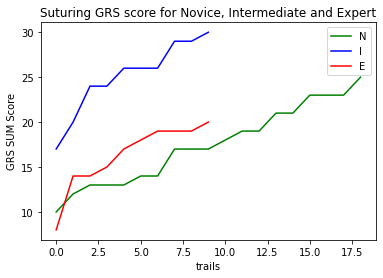

In [0]:
#Suturing GRS
N_GRS = []
I_GRS = []
E_GRS = []
itype = 0

for value in surgeries_metadata_All[0].values():
    itype += 1 
    if value[0] == 'N':
      N_GRS.append(value[1][0])
    elif value[0] == 'I':
      I_GRS.append(value[1][0])
    else:
      E_GRS.append(value[1][0])
N_GRS = np.array(N_GRS)
I_GRS = np.array(I_GRS)
E_GRS = np.array(E_GRS)
plt.plot(range(len(N_GRS)), sorted(N_GRS), color = 'g', label='N')
plt.plot(range(len(I_GRS)), sorted(I_GRS), color = 'blue', label='I')
plt.plot(range(len(E_GRS)), sorted(E_GRS), color = 'r', label='E')
plt.legend()
plt.xlabel('trails')
plt.ylabel('GRS SUM Score')
plt.title("Suturing GRS score for Novice, Intermediate and Expert")
plt.show()

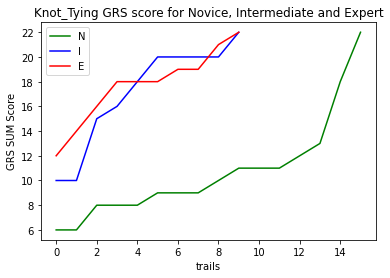

In [0]:
#Knot_Tying GRS
N_GRS = []
I_GRS = []
E_GRS = []
itype = 0

for value in surgeries_metadata_All[1].values():
    itype += 1 
    if value[0] == 'N':
      N_GRS.append(value[1][0])
    elif value[0] == 'I':
      I_GRS.append(value[1][0])
    else:
      E_GRS.append(value[1][0])
N_GRS = np.array(N_GRS)
I_GRS = np.array(I_GRS)
E_GRS = np.array(E_GRS)
plt.plot(range(len(N_GRS)), sorted(N_GRS), color = 'g', label='N')
plt.plot(range(len(I_GRS)), sorted(I_GRS), color = 'blue', label='I')
plt.plot(range(len(E_GRS)), sorted(E_GRS), color = 'r', label='E')
plt.legend()
plt.xlabel('trails')
plt.ylabel('GRS SUM Score')
plt.title("Knot_Tying GRS score for Novice, Intermediate and Expert")
plt.show()

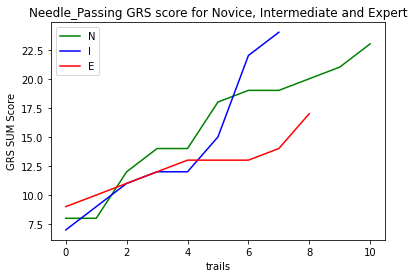

In [0]:
#Needle_Passing GRS
N_GRS = []
I_GRS = []
E_GRS = []
itype = 0

for value in surgeries_metadata_All[2].values():
    itype += 1 
    if value[0] == 'N':
      N_GRS.append(value[1][0])
    elif value[0] == 'I':
      I_GRS.append(value[1][0])
    else:
      E_GRS.append(value[1][0])
N_GRS = np.array(N_GRS)
I_GRS = np.array(I_GRS)
E_GRS = np.array(E_GRS)
plt.plot(range(len(N_GRS)), sorted(N_GRS), color = 'g', label='N')
plt.plot(range(len(I_GRS)), sorted(I_GRS), color = 'blue', label='I')
plt.plot(range(len(E_GRS)), sorted(E_GRS), color = 'r', label='E')
plt.legend()
plt.xlabel('trails')
plt.ylabel('GRS SUM Score')
plt.title("Needle_Passing GRS score for Novice, Intermediate and Expert")
plt.show()

GRS score mean for N, I, E:  [14.76086957 19.07142857 15.5862069 ]


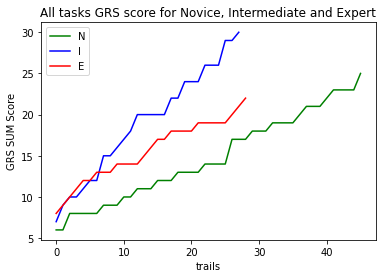

In [0]:
#Store all three tasks GRS info into N, I, E group
N_GRS = []
I_GRS = []
E_GRS = []
for data in surgeries_metadata_All:
  for value in data.values():
    if value[0] == 'N':
      N_GRS.append(value[1][0])
    elif value[0] == 'I':
      I_GRS.append(value[1][0])
    else:
      E_GRS.append(value[1][0])
N_GRS = np.array(N_GRS)
I_GRS = np.array(I_GRS)
E_GRS = np.array(E_GRS)
GRS_mean = np.array([N_GRS.mean(), I_GRS.mean(), E_GRS.mean()])
print("GRS score mean for N, I, E: ", GRS_mean)
plt.plot(range(len(N_GRS)), sorted(N_GRS), color = 'g', label='N')
plt.plot(range(len(I_GRS)), sorted(I_GRS), color = 'blue', label='I')
plt.plot(range(len(E_GRS)), sorted(E_GRS), color = 'r', label='E')
plt.legend()
#plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.xlabel('trails')
plt.ylabel('GRS SUM Score')
plt.title("All tasks GRS score for Novice, Intermediate and Expert")
plt.show()

In [0]:
#------------------------------------------------------#
#------------------Change I to E-----------------------#
#------------------------------------------------------#
def getExpertiseLevelOfSurgery(surgery_name):
  ## function getMetaDataForSurgeries should be already called
  if surgeries_metadata.__contains__(surgery_name):
    if surgeries_metadata[surgery_name][0] == 'I':
      return 'E'
    return surgeries_metadata[surgery_name][0]
  return None 